<a href="https://colab.research.google.com/github/siwookim1114/Data-Science-Projects/blob/main/US_%EB%8B%B9%EB%87%A8%EB%B3%91_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 당뇨병 건강 지표 데이터 분석

## 데이터 불러오기

In [ ]:
### 필요한 라이브러리 임폴트
import pandas as pd

In [ ]:
### DataFrame 생성

# 파일 경로 설정
file_path = "/content/drive/MyDrive/ML AI/Mega/데이터분석/데이터/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

# pd.read_csv() 사용
df = pd.read_csv(file_path)

# 결과 확인하기
print(df)

       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0 

In [ ]:
### 데이터프레임에 대한 요약정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## EDA (탐색적 데이터 분석)

In [ ]:
### 필요한 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### 컬럼 이름 추출
names = df.columns
print(f"각 컬럼의 이름 확인 : \n{names}")

각 컬럼의 이름 확인 : 
Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


### 정답 레이블 분포 분석

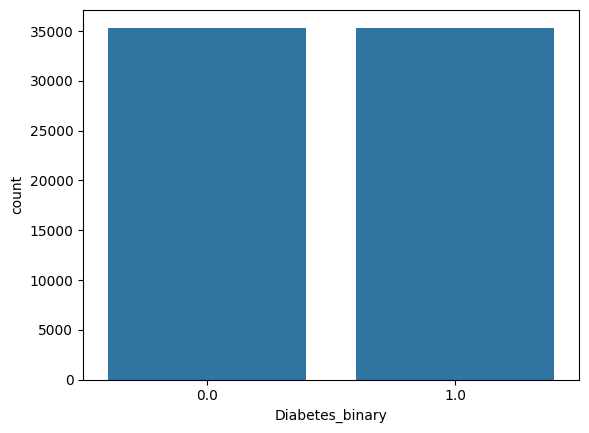

--------------------------------------------------------------------------------
정답 레이블의 빈도수 : 
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


In [ ]:
### 정답 : 당뇨병의 여부 --> 범주형 (명목형) --> 분포 (빈도수/비율) 확인

# 시각화
sns.countplot(data = df, x = names[0])
plt.show()

print("-" * 80)

# 통계량 추출 -> 빈도수 추출
label_counts = df.loc[:, names[0]].value_counts()
print(f"정답 레이블의 빈도수 : \n{label_counts}")

### 당뇨병과 고혈압의 관계 분석

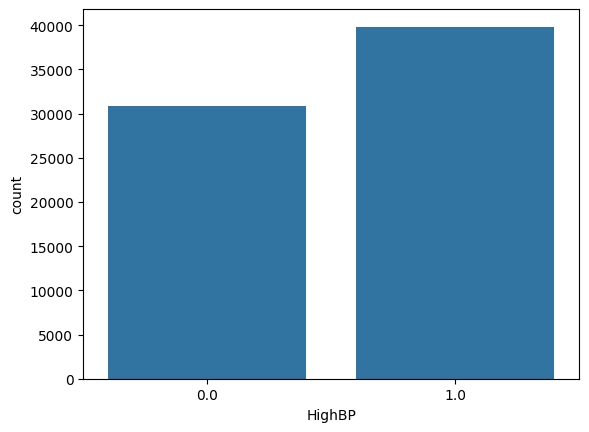

In [ ]:
### 고혈압 컬럼의 분포 시각화
sns.countplot(data = df, x = names[1]) ## 범주형 -> 카운트플롯
plt.show()


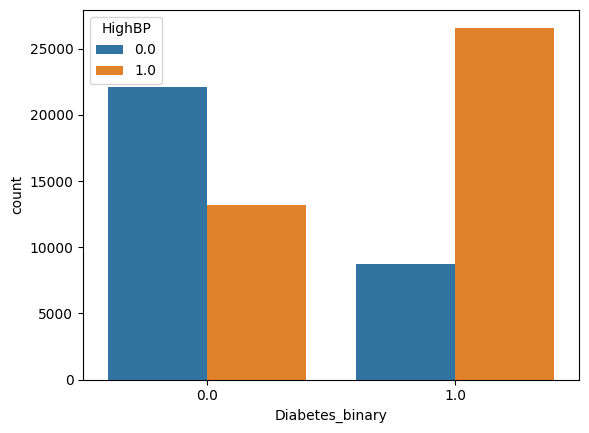

In [ ]:
### 당뇨병과 고혈압의 관계 시각화
sns.countplot(data = df, x = names[0], hue = names[1])
plt.show()

In [ ]:
### 통계 분석 --> 유병률 분석

# 당뇨병에 대해서 정상인 사람 중 고혈압인 사람의 수 추출
condition1 = (df.loc[:, names[0]] == 0.0)    ## 당뇨병에 대해서 정상인 사람
condition2 = (df.loc[:, names[1]] == 1.0)    ## 고혈압인 사람
condition = condition1 & condition2   ## 당뇨병이지 않으면서 고혈압인 사람
normal_hbp_counts = df.loc[condition, :].index.size
print(f"당뇨병에 대해서 정상이면서 고혈압인 사람의 수 : {normal_hbp_counts}")

print("-" * 80)

# 당뇨병에 대해서 정상인 사람 중 고혈압 유병률 추출
ratio1 = normal_hbp_counts/label_counts.iloc[0]
print(f"당뇨병에 대해서 정상인 사람의 고혈압 유병률 : {ratio1}")

print("-" * 80)

# 당뇨병인 사람 중 고혈압인 사람의 수 추출
condition3 = (df.loc[:, names[0]] == 1.0)    ## 당뇨병인 사람
condition4 = (df.loc[:, names[1]] == 1.0)    ## 고혈압인 사람
condition = condition3 & condition4   ## 당뇨병이면서 고혈압인 사람
diabetes_hbp_counts = df.loc[condition, :].index.size
print(f"당뇨병이면서 고혈압인 사람의 수 : {diabetes_hbp_counts}")

print("-" * 80)

# 당뇨병인 사람 중 고혈압 유병률 추출
ratio2 = diabetes_hbp_counts/label_counts.iloc[1]
print(f"당뇨병인 사람의 고혈압 유병률 : {ratio2}")

당뇨병에 대해서 정상이면서 고혈압인 사람의 수 : 13228
--------------------------------------------------------------------------------
당뇨병에 대해서 정상인 사람의 고혈압 유병률 : 0.37424319583545523
--------------------------------------------------------------------------------
당뇨병이면서 고혈압인 사람의 수 : 26604
--------------------------------------------------------------------------------
당뇨병인 사람의 고혈압 유병률 : 0.7526735698523171


### 당뇨병과 고지혈의 관계 분석

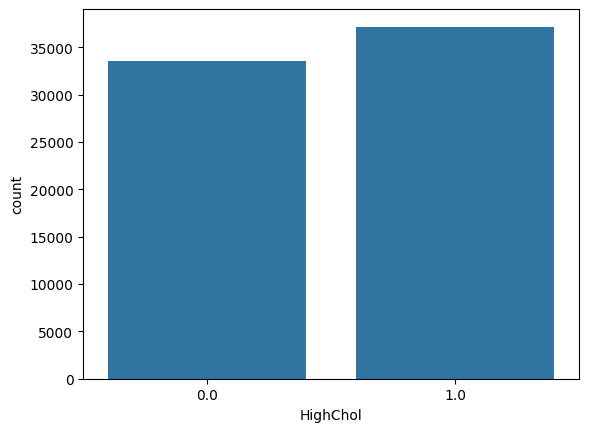

In [ ]:
### 고지혈 컬럼의 분포 시각화
sns.countplot(data = df, x = names[2])
plt.show()

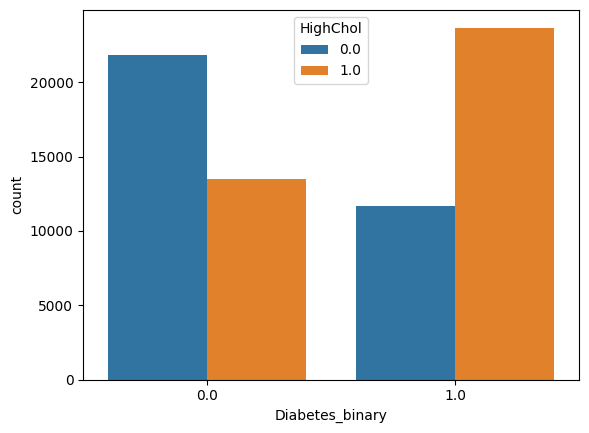

In [ ]:
### 당뇨병과 고지혈의 관계 시각화
sns.countplot(data = df, x = names[0], hue = names[2])
plt.show()

In [ ]:
### 통계 분석 --> 유병률 분석

# 당뇨병에 대해서 정상인 사람 중 고지혈인 사람의 수 추출
condition1 = (df.loc[:, names[0]] == 0.0)    ## 당뇨병에 대해서 정상인 사람
condition2 = (df.loc[:, names[2]] == 1.0)    ## 고지혈인 사람
condition = condition1 & condition2   ## 당뇨병이지 않으면서 고지혈인 사람
normal_hchol_counts = df.loc[condition, :].index.size
print(f"당뇨병에 대해서 정상이면서 고지혈인 사람의 수 : {normal_hchol_counts}")

print("-" * 80)

# 당뇨병에 대해서 정상인 사람 중 고지혈 유병률 추출
ratio1 = normal_hchol_counts/label_counts.iloc[0]
print(f"당뇨병에 대해서 정상인 사람의 고지혈 유병률 : {ratio1}")

print("-" * 80)

# 당뇨병인 사람 중 고지혈인 사람의 수 추출
condition3 = (df.loc[:, names[0]] == 1.0)    ## 당뇨병인 사람
condition4 = (df.loc[:, names[2]] == 1.0)    ## 고지혈인 사람
condition = condition3 & condition4   ## 당뇨병이면서 고지혈인 사람
diabetes_hchol_counts = df.loc[condition, :].index.size
print(f"당뇨병이면서 고지혈인 사람의 수 : {diabetes_hchol_counts}")

print("-" * 80)

# 당뇨병인 사람 중 고지혈 유병률 추출
ratio2 = diabetes_hchol_counts/label_counts.iloc[1]
print(f"당뇨병인 사람의 고지혈 유병률 : {ratio2}")

당뇨병에 대해서 정상이면서 고지혈인 사람의 수 : 13477
--------------------------------------------------------------------------------
당뇨병에 대해서 정상인 사람의 고지혈 유병률 : 0.38128784020822726
--------------------------------------------------------------------------------
당뇨병이면서 고지혈인 사람의 수 : 23686
--------------------------------------------------------------------------------
당뇨병인 사람의 고지혈 유병률 : 0.6701182594918803


### 당뇨병과 BMI(체질량수)의 관계 분석

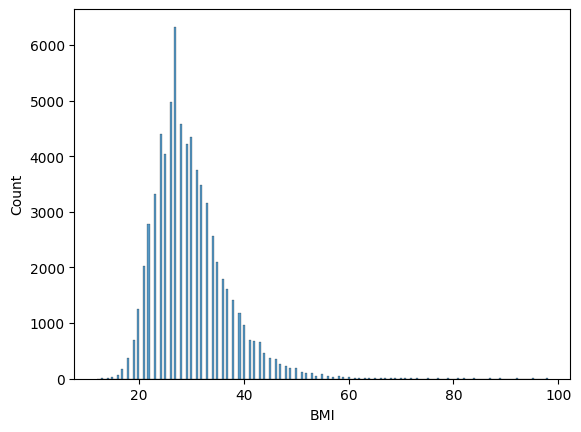

In [ ]:
### BMI 컬럼의 분포 시각화

'''
# 대한비만학회
BMI 23-24.9 kg/m2 :비만 전 단계(과체중 or 위험체중)
BMI 25-29.9 kg/m2 :1단계비만
BMI 30-34.9 kg/m2 :2단계비만
BMI ≥ 35 kg/m2 :3단계비만(고도비만)


# 미국 기준
BMI 18.5~24.9 : 정상
BMI 25~29 : 과체중
BMI 30 이상 : 비만
'''
sns.histplot(data = df, x = names[4])
plt.show()

In [ ]:
### BMI 컬럼에 대한 요약 통계량
stats_bmi = df.loc[:, names[4]].describe()
print(f"BMI 컬럼에 대한 요약 통계량 : \n{stats_bmi}")

BMI 컬럼에 대한 요약 통계량 : 
count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64


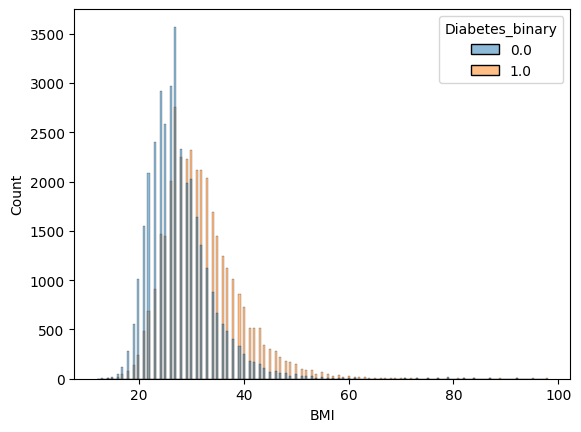

In [ ]:
### 당뇨병과 BMI 컬럼의 관계 시각화
sns.histplot(data = df, x = names[4], hue = names[0])
plt.show()

## 당뇨병인 사람은 전체적으로 평균도 그렇고 BMI가 큰 쪽으로 치우쳐져 있음

In [ ]:
### 통계 분석 --> 유병률 분석

# 비만이 아닌 사람 중 당뇨병인 사람의 수 추출
condition1 = (df.loc[:, names[4]] < 30)    ## 비만이 아닌 사람
condition2 = (df.loc[:, names[0]] == 1.0)    ## 당뇨병인 사람
condition = condition1 & condition2
normal_diabetes_counts = df.loc[condition, :].index.size
print(f"비만이 아닌 사람 중 당뇨병의 수 : \n{normal_diabetes_counts}")

print("-" * 80)

# 비만이 아닌 사람의 당뇨병 유병률 추출
ratio1 = normal_diabetes_counts/len(df.loc[condition1, :].index)
print(f"비만이 아닌 사람의 당뇨병 유병률 : \n{ratio1}")

print("-" * 80)

# 비만인 사람 중 당뇨병인 사람의 수 추출
condition3 = (df.loc[:, names[4]] >= 30)    ## 비만인 사람
condition4 = (df.loc[:, names[0]] == 1.0)    ## 당뇨병인 사람
condition = condition3 & condition4
obesity_diabetes_counts = df.loc[condition, :].index.size
print(f"비만인 사람 중 당뇨병인 사람의 수 : \n{obesity_diabetes_counts}")

print("-" * 80)

# 비만인 사람의 당뇨병 유병률 추출
ratio2 = obesity_diabetes_counts/len(df.loc[condition3, :].index)
print(f"비만인 사람의 당뇨병 유병률 : \n{ratio2}")


비만이 아닌 사람 중 당뇨병의 수 : 
14789
--------------------------------------------------------------------------------
비만이 아닌 사람의 당뇨병 유병률 : 
0.37680900937627393
--------------------------------------------------------------------------------
비만인 사람 중 당뇨병인 사람의 수 : 
20557
--------------------------------------------------------------------------------
비만인 사람의 당뇨병 유병률 : 
0.6537654242462791


### 당뇨병과 성별의 관계 분석

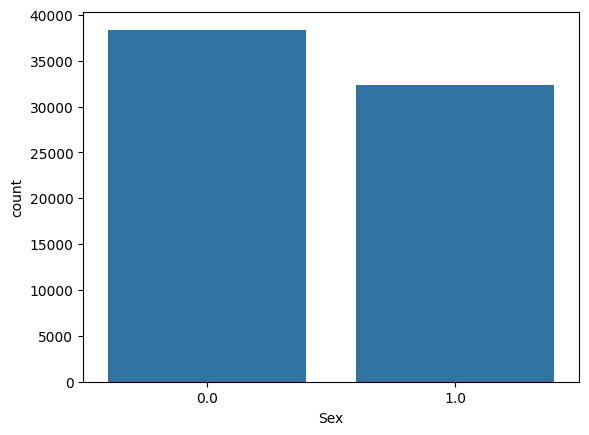

In [ ]:
### 성별 분포의 시각화
sns.countplot(data = df, x = names[-4])  ## Sex (Gender)
plt.show()

In [ ]:
### 성별 분포에 대한 통계 분석
gender_counts = df.loc[:, names[-4]].value_counts()
print(f"남녀의 빈도수 : \n{gender_counts}")

남녀의 빈도수 : 
Sex
0.0    38386
1.0    32306
Name: count, dtype: int64


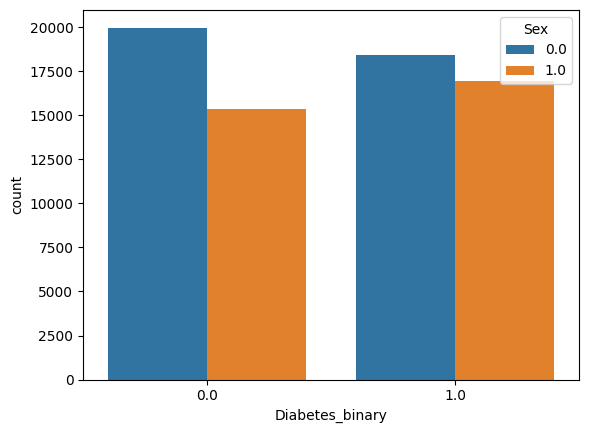

In [ ]:
### 당뇨병과 성별의 관계 시각화 (1)
sns.countplot(data = df, x = names[0], hue = names[-4])
plt.show()

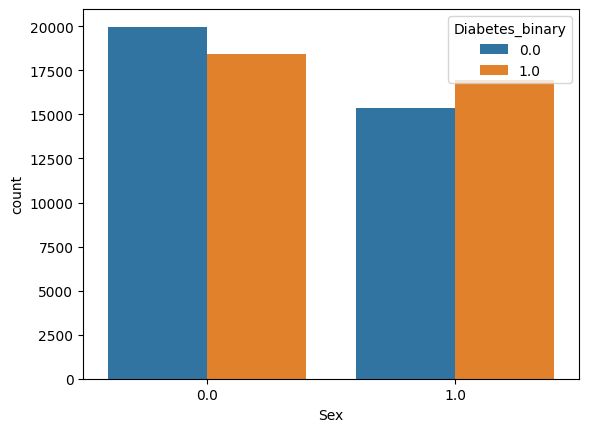

In [ ]:
### 당뇨병과 성별의 관계 시각화 (2)
sns.countplot(data = df, x = names[-4], hue = names[0])
plt.show()

In [ ]:
### 통계 분석 --> 유병률 분석

# 여성중에서 당뇨병인 사람의 수 추출
condition = (df.loc[:, names[-4]] == 0.0) & (df.loc[:, names[0]] == 1.0)  ## 여성이면서 당뇨병인 사람의 수 (그에 해당되는 row들을 다 추출)
 ## 총 이 데이터프레임 안에 해당되는 row의 수는 18411 콜롬은 22 => 튜플로 (18411, 22) 그래서 shape[0] 만 하면 row 숫자만 뽑을 수 있음
female_diabetes_counts = df.loc[condition, :].shape[0]
print(f"여성중에서 당뇨병인 사람의 수 : {female_diabetes_counts}")

print("-" * 80)

# 여성의 당뇨병 유병률 추출
ratio1 = female_diabetes_counts / gender_counts[0] ## gender_counts.iloc[0]
print(f"여성의 당뇨병 유병률 : {ratio1}")

print("-" * 80)

# 남성중에서 당뇨병인 사람의 수 추출
condition = (df.loc[:, names[-4]] == 1.0) & (df.loc[:, names[0]] == 1.0)
male_diabetes_counts = df.loc[condition, :].shape[0]
print(f"남성중에서 당뇨병인 사람의 수 : {male_diabetes_counts}")

print("-" * 80)

# 남성의 당뇨병 유병률 추출
ratio2 = male_diabetes_counts / gender_counts[1]
print(f"남성의 당뇨병 유병률 : {ratio2}")

여성중에서 당뇨병인 사람의 수 : 18411
--------------------------------------------------------------------------------
여성의 당뇨병 유병률 : 0.4796279893711249
--------------------------------------------------------------------------------
남성중에서 당뇨병인 사람의 수 : 16935
--------------------------------------------------------------------------------
남성의 당뇨병 유병률 : 0.5242060298396582


### 당뇨병과 연령의 관계 분석

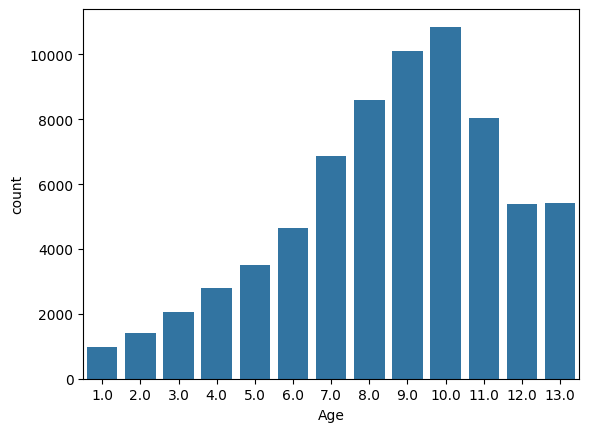

In [ ]:
### 연령 컬럼의 분포 시각화
'''
### 나이 컬럼 : 1 - 13단계 범주화
# 1단계 : 18 - 24
# 2단계 : 25 - 29
# 3단계 : 30 - 34
# 4단계 : 35 - 39
# 5단계 : 40 - 44
# 6단계 : 45 - 49
# 7단계 : 50 - 54
# 8단계 : 55 - 59
# 9단계 : 60 - 64
# 10단계 : 65 - 69
# 11단계 : 70 - 74
# 12단계 : 75 - 79
# 13단계 : 80 or older
'''

sns.countplot(data = df, x = names[-3])
plt.show()

## 10단계 까지는 계속 증가하나 10단계 이후부터는 점차 감소하는걸 볼 수 있음

In [ ]:
### 나이 컬럼의 연령 단계별 인구수 통계 분석
# age_counts = df.loc[:, names[-3]].value_counts().sort_values()  ## sort_values() => 오름차순으로 정렬 (value_counts()랑 반대)
age_counts = df.loc[:, names[-3]].value_counts().sort_index()  ## sort_index() => 인덱스 순서대로 정렬 (오름차순으로)
print(f"연령 단계별 인구수 : \n{age_counts}")

연령 단계별 인구수 : 
Age
1.0       979
2.0      1396
3.0      2049
4.0      2793
5.0      3520
6.0      4648
7.0      6872
8.0      8603
9.0     10112
10.0    10856
11.0     8044
12.0     5394
13.0     5426
Name: count, dtype: int64


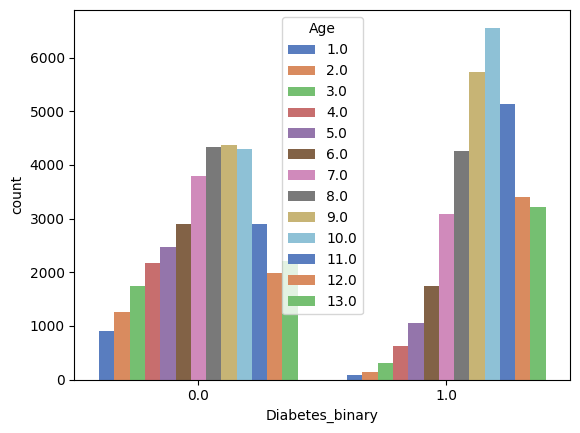

In [ ]:
### 당뇨병과 연령 컬럼의 관계 시각화(1)
sns.countplot(data = df, x = names[0], hue = names[-3], palette = "muted")
plt.show()

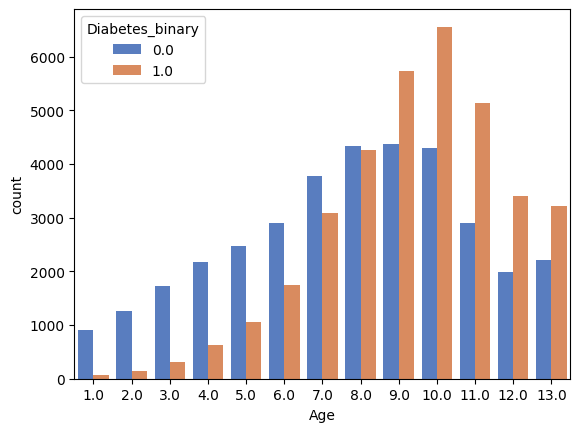

In [ ]:
### 당뇨병 컬럼과 연령 컬럼의 고나계 시각화 (2)
sns.countplot(data = df, x = names[-3], hue = names[0], palette = "muted")
plt.show()

당뇨병 환자의 연령 단계별 인구수 : 
Age
1.0       78
2.0      140
3.0      314
4.0      626
5.0     1051
6.0     1742
7.0     3088
8.0     4263
9.0     5733
10.0    6558
11.0    5141
12.0    3403
13.0    3209
Name: count, dtype: int64
--------------------------------------------------------------------------------
연령 단계별 당뇨병 유병률 : 
Age
1.0     0.079673
2.0     0.100287
3.0     0.153245
4.0     0.224132
5.0     0.298580
6.0     0.374785
7.0     0.449360
8.0     0.495525
9.0     0.566950
10.0    0.604090
11.0    0.639110
12.0    0.630886
13.0    0.591412
Name: count, dtype: float64
--------------------------------------------------------------------------------


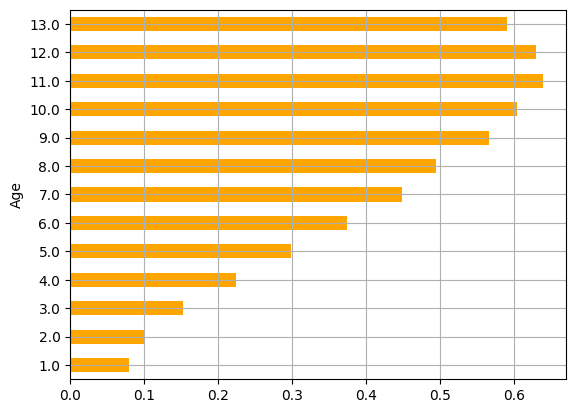

In [ ]:
### 통계 분석 --> 연령의 단계별 당뇨병의 유병률 계산 및 시각화

# 당뇨병 환자의 연령 단계별 인구수 추출
condition = (df.loc[:, names[0]] == 1.0)
diabetes_age_counts = df.loc[condition, names[-3]].value_counts().sort_index()
print(f"당뇨병 환자의 연령 단계별 인구수 : \n{diabetes_age_counts}")

print("-" * 80)

# 연령 단계별 인구수 대비 당뇨병 환자 유병률 추출
ratio = diabetes_age_counts / age_counts   ## Series / Series 로 계산하면 결과도 Series
print(f"연령 단계별 당뇨병 유병률 : \n{ratio}")

print("-" * 80)
# 연령 단계별 당뇨병 유병률의 시각화 --> Series.plot(kind = "bar")
ratio.plot(kind = "barh", grid = True, color = "orange") ## 수평 막대 그래프 ## grid : 격자무늬를 넣을 수 있음.
plt.show()

### 당뇨병과 교육 수준의 관계 분석

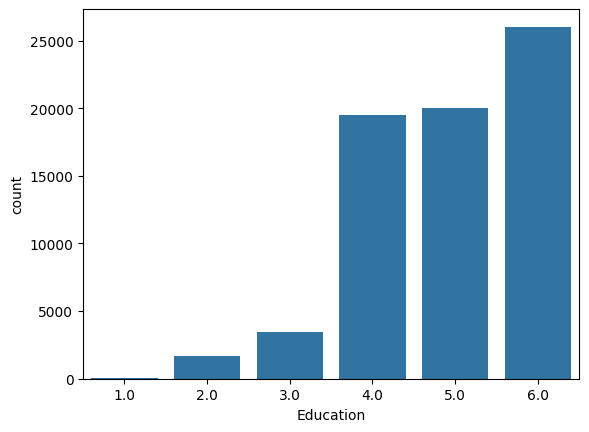

In [ ]:
### 교육 수준 컬럼의 분포 시각화
sns.countplot(data = df, x = names[-2])
plt.show()

In [ ]:
### 교육 수준 단계별 인구수 통계 분석
edu_counts = df.loc[:, names[-2]].value_counts().sort_index()
print(f"교육 수준 단계별 인구수 : \n{edu_counts}")

교육 수준 단계별 인구수 : 
Education
1.0       75
2.0     1647
3.0     3447
4.0    19473
5.0    20030
6.0    26020
Name: count, dtype: int64


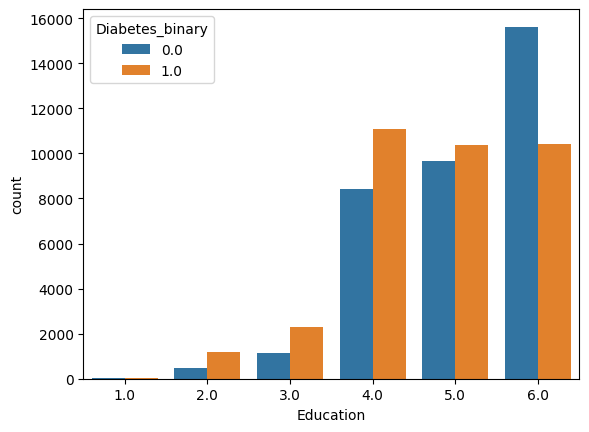

In [ ]:
### 당뇨병과 교육 수준의 관계 시각화
sns.countplot(data = df, x = names[-2], hue = names[0])
plt.show()

## 당뇨병의 수가 그래프 상 학력이 높아질수록 높아지지만 그렇게 해석하면 안됨. 당뇨병 환자의 수를 해당되는 총 인구수로 나눠서 비율로 따져야됨 그래야 제대로 된 분석을 할 수 있음.

당뇨병 환자의 교육 수준 단계별 인구수: 
Education
1.0       47
2.0     1183
3.0     2296
4.0    11066
5.0    10354
6.0    10400
Name: count, dtype: int64
--------------------------------------------------------------------------------
교육 수준 단계별 당뇨병 유병률 : 
Education
1.0    0.626667
2.0    0.718276
3.0    0.666086
4.0    0.568274
5.0    0.516925
6.0    0.399693
Name: count, dtype: float64
--------------------------------------------------------------------------------


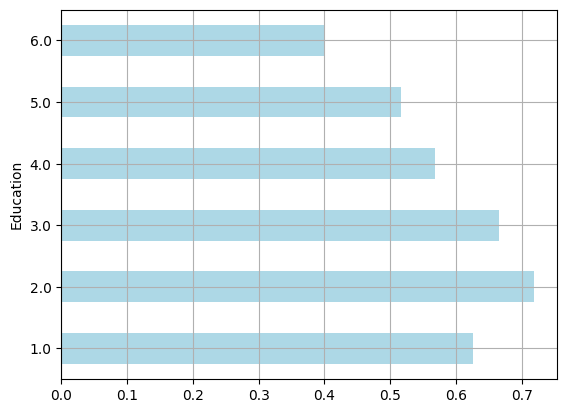

In [ ]:
### 통계 분석 --> 교육 수준의 단계별 당뇨병의 유병률 계산 및 시각화

# 당뇨병 환자의 교육 수준 단계별 인구수 추출
condition = (df.loc[:, names[0]] == 1.0)   ## 당뇨병인 환자의 수만 추출
diabetes_edu_counts = df.loc[condition, names[-2]].value_counts().sort_index()   ## 각 학력 레벨별로 당뇨병에 해당되는 환자의 수
print(f"당뇨병 환자의 교육 수준 단계별 인구수: \n{diabetes_edu_counts}")

print("-" * 80)

# 교육 수준 단계별 유병률 추출
ratio = diabetes_edu_counts / edu_counts   ## 시리즈 나누기 시리즈래서 저 나눗셈 하면 각 단계별로 교육수준이 나옴
print(f"교육 수준 단계별 당뇨병 유병률 : \n{ratio}")

print("-" * 80)

# 교육 수준 단계별 당뇨병 유병률 시각화
## 시리즈에 대해서 바로 .plot(kind = "")
ratio.plot(kind = "barh", grid = True, color = "lightblue")
plt.show()

## 결과: 교육 수준이 높아질수록 유병률이 작아짐 (다만 1단계는 표본이 너무 작기 때문에 제대로 된 통계를 내기 어려움 (sampling bias))

### 당뇨병과 연간 가구 소득의 관계 분석

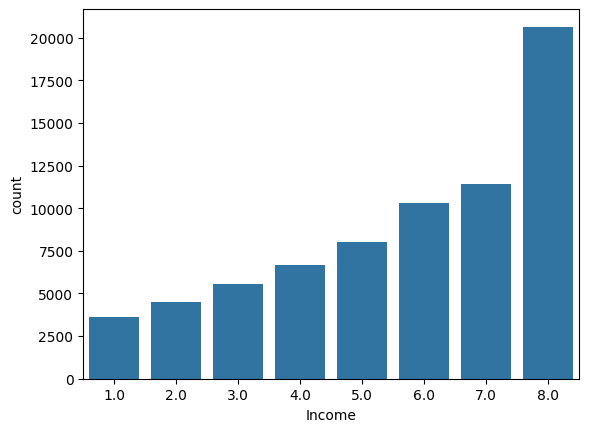

In [ ]:
### 연간 가구 소득 컬럼의 분포 시각화
sns.countplot(data = df, x= names[-1])
plt.show()

In [ ]:
## 연간 가구 소득 컬럼의 단계별 인구수 통계 분석
income_counts = df.loc[:, names[-1]].value_counts().sort_index()
print(f"연간 가구 소득 단계별 인구수 : \n{income_counts}")

연간 가구 소득 단계별 인구수 : 
Income
1.0     3611
2.0     4498
3.0     5557
4.0     6658
5.0     8010
6.0    10287
7.0    11425
8.0    20646
Name: count, dtype: int64


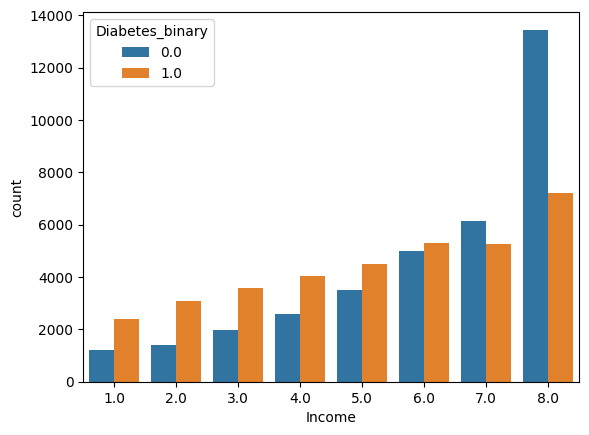

In [ ]:
### 당뇨병과 연간 가구 소득 컬럼의 관계 분석
sns.countplot(data = df, x = names[-1], hue = names[0])
plt.show()

당뇨병 환자의 가구 소득 수준별 인구수: 
Income
1.0    2383
2.0    3086
3.0    3568
4.0    4054
5.0    4504
6.0    5291
7.0    5265
8.0    7195
Name: count, dtype: int64
--------------------------------------------------------------------------------
연간 가구 소득 수준별 당뇨병 유병률 : 
Income
1.0    0.659928
2.0    0.686083
3.0    0.642073
4.0    0.608892
5.0    0.562297
6.0    0.514338
7.0    0.460832
8.0    0.348494
Name: count, dtype: float64
--------------------------------------------------------------------------------


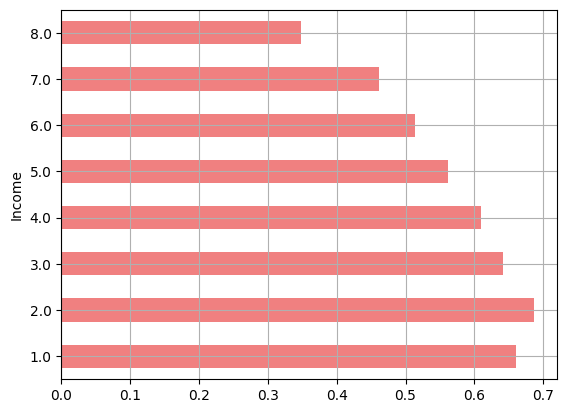

In [ ]:
### 통계 분석 --> 연간 가구 소득 수준별 당뇨병의 유병률 계산 및 시각화

# 당뇨병 환자의 연간 가구 소득 수준별 인구수 추출
condition = (df.loc[:, names[0]] == 1.0)   ## 당뇨병인 환자의 수만 추출
diabetes_income_counts = df.loc[condition, names[-1]].value_counts().sort_index()   ## 각 가구 소득 수준별로 당뇨병에 해당되는 환자의 수
print(f"당뇨병 환자의 가구 소득 수준별 인구수: \n{diabetes_income_counts}")

print("-" * 80)

# 연간 가구 소득 수준별 유병률 추출
ratio = diabetes_income_counts / income_counts
print(f"연간 가구 소득 수준별 당뇨병 유병률 : \n{ratio}")

print("-" * 80)

# 연간 가구 소득 수준별 당뇨병 유병률 시각화
ratio.plot(kind = "barh", grid = True, color = "lightcoral")
plt.show()


### 데이터 분석의 결과를 적용

In [ ]:
### 높은 확률로 당뇨병이 아닐 것 같은 사람 예측

condition1 = (df.loc[:, names[1]] == 0.0)
condition2 = (df.loc[:, names[2]] == 0.0)
condition3 = (df.loc[:, names[4]] < 30)
condition4 = (df.loc[:, names[-4]] == 0.0)
condition5 = (df.loc[:, names[-3]] < 4)
condition6 = (df.loc[:, names[-2]] == 6.0)
condition7 = (df.loc[:, names[-1]] == 8.0)
condition = condition1 & condition2 & condition3 & condition4 & condition5 & condition6 & condition7
print(df.loc[condition, names[0]] .value_counts())

Diabetes_binary
0.0    286
1.0     11
Name: count, dtype: int64


In [ ]:
### 높은 확률로 당뇨병일 것 같은 사람 예측

condition1 = (df.loc[:, names[1]] == 1.0)
condition2 = (df.loc[:, names[2]] == 1.0)
condition3 = (df.loc[:, names[4]] >= 30)
condition4 = (df.loc[:, names[-4]] == 1.0)
condition5 = (df.loc[:, names[-3]] >= 4)
condition6 = (df.loc[:, names[-2]] < 5.0)
condition7 = (df.loc[:, names[-1]] < 6.0)
condition = condition1 & condition2 & condition3 & condition4 & condition5 & condition6 & condition7
print(df.loc[condition, names[0]] .value_counts())

Diabetes_binary
1.0    1253
0.0     232
Name: count, dtype: int64


## 모델링

### 학습용 데이터와 평가용 데이터 생성

In [ ]:
### 전체 데이터 --> 학습용 : 평가용 = 80 : 20으로 분할

# 필요한 함수 임포트
from sklearn.model_selection import train_test_split

# X_data 생성
X_data = df.drop(columns = names[0])
# print(f"X_data : \n{X_data}")

# print("-" * 80)

# y_data 생성
y_data = df.loc[:, names[0]]
# print(f"y_data : \n{y_data}")

# train_test_split() 함수 호출
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y_data)


In [ ]:
### 학습용 데이터 확인

## 확인 방법 : 인덱스 확인

# X_train 의 인덱스 확인
print(X_train.index)

print("-" * 80)

# y_train 의 인덱스 확인
print(y_train.index)

Index([35369, 40967, 27238, 50582, 38854, 49562, 23991, 13093, 25789, 45889,
       ...
       23615,  6543, 38363, 45899, 65393, 22335,  7166, 66883, 36604, 27209],
      dtype='int64', length=56553)
--------------------------------------------------------------------------------
Index([35369, 40967, 27238, 50582, 38854, 49562, 23991, 13093, 25789, 45889,
       ...
       23615,  6543, 38363, 45899, 65393, 22335,  7166, 66883, 36604, 27209],
      dtype='int64', length=56553)


### DecisionTree 분류 모델을 이용한 당뇨병 유무 분류

#### 모델 생성

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
dt = DecisionTreeClassifier(random_state = 0)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

#### 모델 학습시 생성된 의자 결정 트리 구조 시각화

In [ ]:
### 학습된 모델의 의사 결정 트리의 최대 깊이 추출
max_depth = dt.get_depth()
print(f"학습된 모델의 최대 깊이 : {max_depth}")

학습된 모델의 최대 깊이 : 37


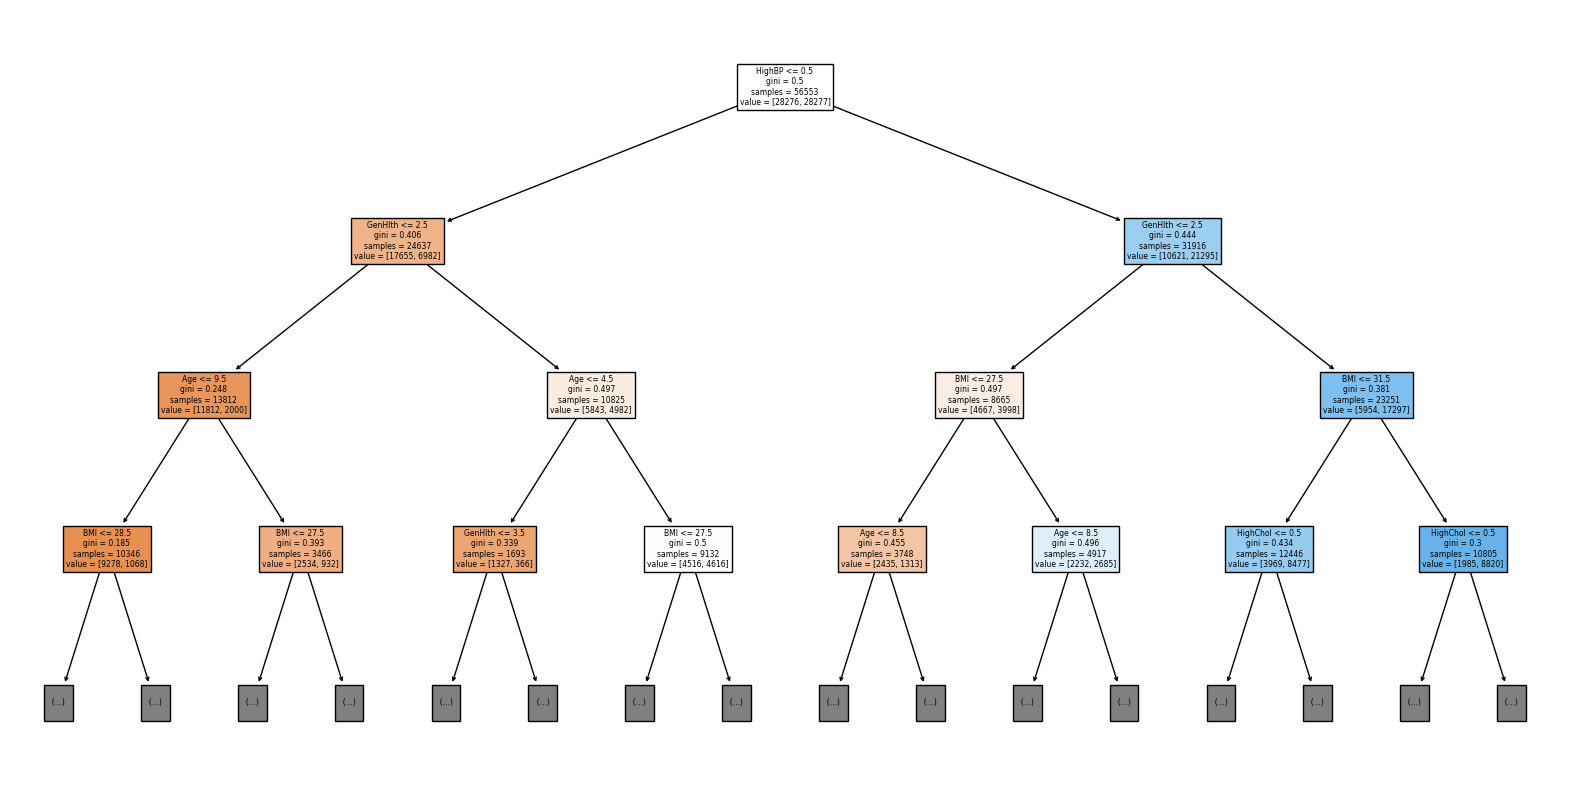

In [ ]:
# 필요한 함수 임폴트
from sklearn.tree import plot_tree

# 이미지 크기 재설정
plt.figure(figsize = (20, 10))

# plot_tree() 함수 호출
plot_tree(decision_tree = dt, max_depth = 3, feature_names = X_train.columns, filled = True)
plt.show()

#### 학습용 데이터와 평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터를 이용한 예측
pred_train = dt.predict(X_train)
print(f"학습용 데이터에 대한 예측의 결과 : {pred_train}")

print("-" * 80)

# 평가용 데이터를 이용한 예측
pred_test = dt.predict(X_test)
print(f"평가용 데이터에 대한 예측의 결과 : {pred_test}")

학습용 데이터에 대한 예측의 결과 : [1. 1. 0. ... 1. 1. 0.]
--------------------------------------------------------------------------------
평가용 데이터에 대한 예측의 결과 : [0. 0. 0. ... 1. 1. 0.]


#### 모델 평가

In [ ]:
# 필요한 함수 임폴트
from sklearn.metrics import accuracy_score

# 학습용 데이터에 대한 성능 평가
accuracy_train = accuracy_score(y_train, pred_train)

# 평가용 데이터에 대한 성능평가
accuracy_test = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f"학습용 데이터에 대한 정확도 : {accuracy_train}")
print("-" * 80)
print(f"평가용 데이터에 대한 정확도 : {accuracy_test}")

# 결과: 결정경계가 복잡하면 조금만 데이터가 달라져도 정확도가 확 떨어짐

학습용 데이터에 대한 정확도 : 0.995190352412781
--------------------------------------------------------------------------------
평가용 데이터에 대한 정확도 : 0.654501732795813


## GridSearchCV를 이용한 모델 최적화

### 탐색 모델 생성

In [ ]:
# GridSearchCV 모델 생성에 필요한 함수 임폴트
from sklearn.model_selection import GridSearchCV

## 최적화 할 기본 모델 생성
dt = DecisionTreeClassifier(random_state = 0)   ## 교차 검증할때 자동으로 시드가 정해짐 (대신 random_state 는 손대면 안됨)

# 최적화 할 매개 변수와 탐색의 조건 설정 (key:value 쌍의 형태로 들어감)  --> python dict
params = {"max_depth" : [3, 4, 5, 6, 7, 8, 9, 10]}   ## 깊이의 후보들

## 깊이별로 교차검증을 함 (3일떄 10번 교차검증, 4일때 10번 교차검증, ....10일때 10번 교차검증 => 그 중에서 교차검증 했을때 7일때가 가장 최적화)

# GridSearchCV 탐색 모델 호출, 모델 생성
grid_dt = GridSearchCV(estimator = dt,    ## 최적화 할 모델
                       param_grid = params,
                       scoring = "accuracy",  ## accuracy 기준으로 평가
                       cv = 10                ## 10개로 분할해서 교차검증 한다
                       )

## 탐색 모델 학습 및 평가
grid_dt.fit(X_train, y_train)   ## 이렇게 학습을 시키면 내부에서 교차검증까지 해서 깊이별로 accuracy가 나옴 (그 기록의 결과가 가장 최적화 된걸 기록함)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
### 최적의 성능을 나타내는 하이퍼파라미터 확인
print(grid_dt.best_params_)  ## 최적의 매개변수에 대한 값

{'max_depth': 7}


In [ ]:
### 검증용에 대한 최적의 성능을 확인
print(grid_dt.best_score_)

0.7404380597210916


### best 모델 생성

In [ ]:
best_dt = DecisionTreeClassifier(max_depth = 7, random_state = 0)   ## 이 조건에서 검증용에서 가장 좋았던 최적화 된 모델

### best 모델 학습

In [ ]:
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_dt.predict(X_test)

### best 모델 평가

In [ ]:
# 평가용 데이터에 대한 성능 평가
accuracy_test = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f"평가용 데이터에 대한 accuracy : {accuracy_test}")


## 검증용이 74% 정도 나왔고 실제 평가용 데이터에 대해서는 74.1% 정도 나옴. 근데 비슷하게 나옴. 평균적으로는 비슷하게 나옴 아주 크게 차이 날때도 있지만.
## => 모델링에서 최적화는 기본이다.

평가용 데이터에 대한 accuracy : 0.7412122498055025


In [ ]:
# 필요한 함수 임폴트
from sklearn.metrics import classification_report

# 평가용 데이터에 대한 성능 평가
performance = classification_report(y_test, pred_test)

# 결과 확인하기
print(f"평가용 데이터에 대한 성능 평가 : \n{performance}")

평가용 데이터에 대한 성능 평가 : 
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      7070
         1.0       0.73      0.75      0.74      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



## RandomForest 분류 모델을 이용한 당뇨병 유무 분류

### 탐색 모델 생성

In [ ]:
## 필요한 함수 임폴트
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# 최적화 할 기본 모델 생성
rf = RandomForestClassifier(random_state = 0)

# 최적화 할 매개 변수와 탐색 조건 설정
params = {"n_estimators" : [100, 200, 300, 400],  ## 사용할 decision_tree의 개수 (default : 100 trees)
          "max_depth" : [5, 6, 7, 8, 9]}

# 교차 검증 모델 생성
## n_splits : 학습용 데이터를 몇개로 분할할건지
## shuffle : 썪을건지 말건지
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

# 탐색 모델 생성
grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params,
                       scoring = "accuracy",
                       cv = kfold) ## cv : 검증모델

# 탐색 모델 학습 및 평가
grid_rf.fit(X_train, y_train)




GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
### 최적의 성능일때의 하이퍼파라미터 조합 확인
print(grid_rf.best_params_)

{'max_depth': 9, 'n_estimators': 100}


In [ ]:
### 검증용 데이터에 대한 최적의 성능 확인
print(grid_rf.best_score_)

0.749792179799466


### best 모델 생성

In [ ]:
from sklearn.ensemble import RandomForestClassifier
best_rf = RandomForestClassifier(n_estimators = 100, max_depth = 9, random_state = 0)

### best 모델 학습

In [ ]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=0)

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_rf.predict(X_test)

### best 모델 평가

In [ ]:
# 필요한 함수 임폴트
from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 성능 평가
accuracy = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f"평가용 데이터에 대한 accuracy : {accuracy}")

평가용 데이터에 대한 accuracy : 0.7509017610863569


In [ ]:
# 평가용 데이터에 대한 성능 평가
performance = classification_report(y_test, pred_test)

# 결과 확인하기
print(f"평가용 데이터에 대한 성능 평가: \n{performance}")

평가용 데이터에 대한 성능 평가: 
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      7070
         1.0       0.73      0.78      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



## LightGBM 분류 모델을 이용한 당뇨병 분류

### 탐색 모델 생성

In [ ]:
# 필요한 함수 임폴트
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier

# 최적화 할 기본 모델 생성
base_lgbm = LGBMClassifier(random_state = 0,
                           bagging_seed = 0,
                           feature_fraction_seed = 0,
                           data_random_seed = 0,
                           drop_seed = 0,
                           verbose = -1)

# 최적화 할 매개 변수와 탐색 조건 설정
params = {"n_estimators" : [50, 100, 200, 300],
          "learning_rate" : [0.05, 0.1, 0.5],
          "max_depth" : [3, 4, 5]}

# 교차 검증 모델 호출, 생성
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

# 탐색 모델 호출, 생성
grid_lgbm = GridSearchCV(
    estimator = base_lgbm,
    param_grid = params,
    scoring = "accuracy",
    cv = kfold
)

# 탐색 모델 학습 및 평가
grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LGBMClassifier(bagging_seed=0, data_random_seed=0,
                                      drop_seed=0, feature_fraction_seed=0,
                                      random_state=0, verbose=-1),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [ ]:
# 최적의 성능을 나타내는 하이퍼파라미터 조합 확인
print(grid_lgbm.best_params_)

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}


In [ ]:
# 검증용에 대한 최적의 성능 확인
print(grid_lgbm.best_score_)

0.7537884226687619


### best 모델 생성

In [ ]:
from lightgbm import LGBMClassifier
best_lgbm = LGBMClassifier(random_state = 0,
                           bagging_seed = 0,
                           feature_fraction_seed = 0,
                           data_random_seed = 0,
                           drop_seed = 0,
                           verbose = -1,
                           learning_rate = 0.05,
                           max_depth = 4,
                           n_estimators = 300)

### best 모델 학습

In [ ]:
best_lgbm.fit(X_train, y_train)   ## 최적의 조건으로 학습

LGBMClassifier(bagging_seed=0, data_random_seed=0, drop_seed=0,
               feature_fraction_seed=0, learning_rate=0.05, max_depth=4,
               n_estimators=300, random_state=0, verbose=-1)

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_lgbm.predict(X_test)

### best 모델 평가

In [ ]:
# 평가에 필요한 함수
from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 성능 평가
accuracy = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f"평가용 데이터에 대한 accuracy : {accuracy}")

평가용 데이터에 대한 accuracy : 0.7554989744677841


In [ ]:
# 평가용 데이터에 대한 성능 평가
performance = classification_report(y_test, pred_test)

# 결과 확인하기
print(f"평가용 데이터에 대한 성능 평가: \n{performance}")

평가용 데이터에 대한 성능 평가: 
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75      7070
         1.0       0.74      0.79      0.76      7069

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



## XGBoost 분류 모델을 이용한 당뇨병 유무 분류

### 탐색 모델 생성

In [ ]:
# 필요한 함수 임폴트
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# 최적화 할 기본 모델 생성
base_xgb = XGBClassifier(random_state = 0)

# 최적화 할 매개 변수와 탐색 조건 설정
params = {"n_estimators" : [50, 100, 200, 300],
          "learning_rate" : [0.05, 0.1, 0.5],
          "max_depth" : [3, 4, 5]}

# 교차 검증 모델 호출, 생성
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

# 탐색 모델 호출, 생성
grid_xgb = GridSearchCV(
    estimator = base_xgb,
    param_grid = params,
    scoring = "accuracy",
    cv = kfold
)

# 탐색 모델 학습 및 평가
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [ ]:
### 최적의 성능을 나타내는 하이퍼파라미터 조합
print(grid_xgb.best_params_)

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}


In [ ]:
### 검증용에 대한 최적의 성능 확인
print(grid_xgb.best_score_)

0.7541951470759863


### best 모델 생성

In [ ]:
from xgboost import XGBClassifier
best_xgb = XGBClassifier(learning_rate = 0.05, max_depth = 4, n_estimators = 200, random_state = 0)

### best 모델 학습

In [ ]:
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_xgb.predict(X_test)

### best 모델 평가

In [ ]:
# 평가용 데이터에 대한 성능 평가
accuracy = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f"평가용 데이터에 대한 accuracy : {accuracy}")

평가용 데이터에 대한 accuracy : 0.7543673527123559


In [ ]:
# 평가용 데이터에 대한 성능 평가
performance = classification_report(y_test, pred_test)

# 결과 확인하기
print(f"평가용 데이터에 대한 성능 평가: \n{performance}")

평가용 데이터에 대한 성능 평가: 
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75      7070
         1.0       0.74      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139

